<a href="https://colab.research.google.com/github/MohamedAlaaEldinFarghaly/hello-world/blob/master/projectsBook_MNIST_Handwriting_using_NN_and_ConvNet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST_Handwriting**
  ### **1-REGRESSION NN**

Set random seed for repreducability

In [ ]:
import numpy as np
seed_val =9000
np.random.seed(seed_val)

import mnist data set from keras datasets

In [ ]:
from keras.datasets import mnist

Using TensorFlow backend.


In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_train[0].shape)
print(len(np.unique(y_train)))

(60000, 28, 28)
(10000, 28, 28)
(28, 28)
10


Show some images of training data

In [ ]:
import matplotlib.pyplot as plt

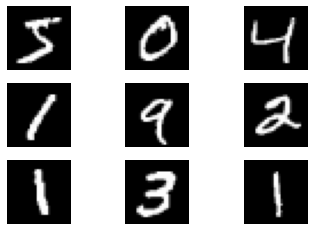

In [ ]:
#plot 9 images
for i in range(0,9):
  plt.subplot(331+i)
  plt.axis('off')
  plt.imshow(X_train[i], cmap='gray')

Set Hyperprameters:

In [ ]:
epochs= 20
batch_size = 128
learning_rate =0.0001

input_shape=(28,28,1)

Set adam optimizer

In [ ]:
from keras.optimizers import Adam
optimizer = Adam(lr = learning_rate)

Build the model using keras

In [ ]:
from keras.models import Sequential
model = Sequential()

from keras.layers import Dense
model.add(Dense(300,input_shape=(784,), activation = 'relu' ,name='Dense_one')) # a layer with 300 neuron
# the input_shape parameter as being equal to (784,) to indicate to the model that it will be accepting input arrays of the shape (784,). 28*28=784 This means that the input layer will have 784 neurons.

#add another layer
model.add(Dense(300, activation = 'relu',name='Dense_two'))
#final layer
model.add(Dense(10, activation = 'softmax',name='output_layer')) # 10 is the number of classes
 
 #compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer,
              metrics = ['accuracy'])
 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_one (Dense)            (None, 300)               235500    
_________________________________________________________________
Dense_two (Dense)            (None, 300)               90300     
_________________________________________________________________
output_layer (Dense)         (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


Split the training data

In [ ]:
from sklearn.model_selection import train_test_split

sX_train, X_val, sy_train, y_val = train_test_split(X_train, y_train, stratify = y_train, test_size = 5000, random_state=42)

In [ ]:
print(sX_train.shape)
print(X_val.shape)
print(sy_train.shape)
print(y_val.shape)

(55000, 28, 28)
(5000, 28, 28)
(55000,)
(5000,)


Reshape the input images to be (28*28,) =(784,)

In [ ]:
sX_train = sX_train.reshape(-1,784)
X_val =X_val.reshape(-1,784)
X_test =X_test.reshape(-1,784)

Fitting the model

In [ ]:
history= model.fit(sX_train,sy_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val,y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 4s 76us/step - loss: 6.1219 - accuracy: 0.8112 - val_loss: 2.3440 - val_accuracy: 0.9030
Epoch 2/20
55000/55000 [==============================] - 4s 69us/step - loss: 1.5409 - accuracy: 0.9207 - val_loss: 1.6498 - val_accuracy: 0.9162
Epoch 3/20
55000/55000 [==============================] - 4s 70us/step - loss: 0.9039 - accuracy: 0.9423 - val_loss: 1.2889 - val_accuracy: 0.9286
Epoch 4/20
55000/55000 [==============================] - 4s 69us/step - loss: 0.5834 - accuracy: 0.9559 - val_loss: 1.0990 - val_accuracy: 0.9306
Epoch 5/20
55000/55000 [==============================] - 4s 69us/step - loss: 0.3828 - accuracy: 0.9663 - val_loss: 0.9993 - val_accuracy: 0.9382
Epoch 6/20
55000/55000 [==============================] - 4s 69us/step - loss: 0.2487 - accuracy: 0.9744 - val_loss: 0.9789 - val_accuracy: 0.9362
Epoch 7/20
55000/55000 [==============================] - 4s 69us/ste

Evaluate Test Data

In [ ]:
loss, acc =  model.evaluate(X_test,y_test)
print('Test loss= ',loss)
print('Accuracy= ',acc)

10000/10000 [==============================] - 0s 38us/step
Test loss=  0.6916365326185768
Accuracy=  0.9609000086784363


Function to plot the train and validation loss and accuracy that we have stored in the history variable:


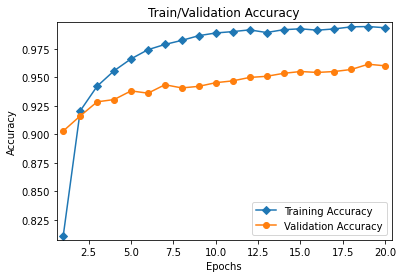

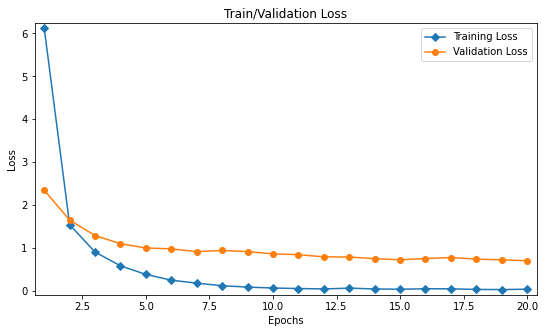

In [ ]:
import matplotlib.pyplot as plt

def loss_plot(history):
  train_acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  plt.plot(np.arange(1,21),train_acc, marker = 'D', label = 'Training Accuracy')
  plt.plot(np.arange(1,21),val_acc, marker = 'o', label = 'Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Train/Validation Accuracy')
  plt.legend()
  plt.margins(0.02)
  plt.show()

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  plt.figure(figsize=(9,5))
  plt.plot(np.arange(1,21),train_loss, marker = 'D', label = 'Training Loss')
  plt.plot(np.arange(1,21),val_loss, marker = 'o', label = 'Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Train/Validation Loss')
  plt.legend()
  plt.margins(0.02)
  plt.show()


loss_plot(history)

  ### **2-CONVOLUTION NN**

In [ ]:
from keras.layers import Conv2D

In [ ]:
cX_train = sX_train.reshape(-1,28,28,1)
cX_val = X_val.reshape(-1,28,28,1)
cX_test = X_test.reshape(-1,28,28,1)
print('Train data shape:', cX_train.shape)
print('Val data shape:', cX_val.shape)
print('Test data shape:', cX_test.shape)

Train data shape: (55000, 28, 28, 1)
Val data shape: (5000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [ ]:
model = Sequential(name='Seq_two')
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu',name='conv2d_one' ))
#32 is (number of kernels/filters)

In [ ]:
from keras.layers import Flatten
model.add(Flatten(name='Flatten_one'))
model.add(Dense(128, activation= 'relu', name='dense_one'))
model.add(Dense(10, activation='softmax',name= 'dense_two'))
model.compile(loss ='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "Seq_two"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_one (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
Flatten_one (Flatten)        (None, 21632)             0         
_________________________________________________________________
dense_one (Dense)            (None, 128)               2769024   
_________________________________________________________________
dense_two (Dense)            (None, 10)                1290      
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2=model.fit(cX_train, sy_train,epochs= epochs, batch_size= batch_size, validation_data=(cX_val,y_val) )

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 42s 763us/step - loss: 1.0429 - accuracy: 0.9145 - val_loss: 0.2203 - val_accuracy: 0.9518
Epoch 2/20
55000/55000 [==============================] - 42s 762us/step - loss: 0.1158 - accuracy: 0.9693 - val_loss: 0.1697 - val_accuracy: 0.9602
Epoch 3/20
55000/55000 [==============================] - 42s 759us/step - loss: 0.0578 - accuracy: 0.9829 - val_loss: 0.1430 - val_accuracy: 0.9668
Epoch 4/20
55000/55000 [==============================] - 42s 760us/step - loss: 0.0325 - accuracy: 0.9904 - val_loss: 0.1522 - val_accuracy: 0.9674
Epoch 5/20
55000/55000 [==============================] - 42s 760us/step - loss: 0.0185 - accuracy: 0.9945 - val_loss: 0.1446 - val_accuracy: 0.9696
Epoch 6/20
55000/55000 [==============================] - 42s 763us/step - loss: 0.0134 - accuracy: 0.9961 - val_loss: 0.1326 - val_accuracy: 0.9698
Epoch 7/20
55000/55000 [==============================] -

In [ ]:
# evaluate model
loss,acc = model.evaluate(cX_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

10000/10000 [==============================] - 2s 206us/step
Test loss: 0.13040405083741788
Accuracy: 0.9789999723434448


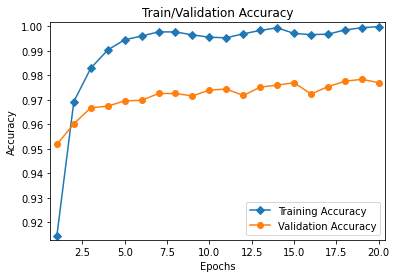

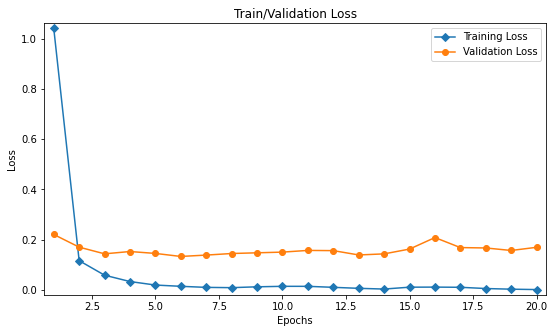

In [ ]:
# plot training loss
loss_plot(history2)